In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/thispc/Desktop/Machine-learning/pandas/kaggle-dataset/auto-mpg.csv')

In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [8]:
# z-score
# formula   --->    x-mean/std

In [30]:
df['z-score'] =(df['displacement'] - df['displacement'].mean())/df['displacement'].std()

In [31]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,z-score
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,1.089233
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1.501624
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,1.194728
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,1.060461
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,1.041280
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,-0.512381
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,-0.924773
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,-0.560333
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,-0.704191


In [34]:
df[(df['z-score'] < -3)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,z-score


<Axes: xlabel='displacement'>

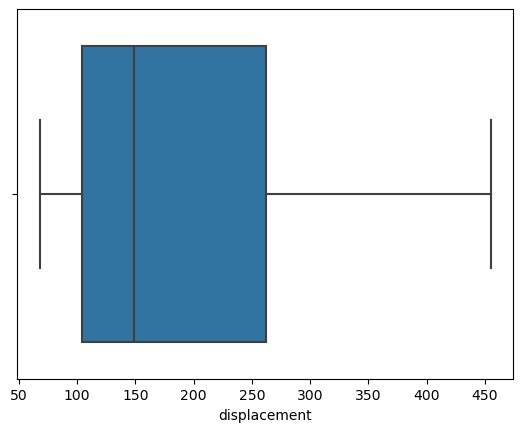

In [36]:
sns.boxplot(x='displacement',data=df)

In [37]:
df['z-score'] =(df['acceleration'] - df['acceleration'].mean())/df['acceleration'].std()

In [38]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,z-score
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,-1.293870
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,-1.475181
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,-1.656492
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,-1.293870
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,-1.837804
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0.011571
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,3.275173
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,-1.438919
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1.099439


In [47]:
df[(df['z-score'] < -3) | (df['z-score'] > 3)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,z-score
299,27.2,4,141.0,71,3190,24.8,79,2,peugeot 504,3.347698
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,3.275173


# z score find two outiler due to mean is used in this 

In [54]:
q1 = np.quantile(df['acceleration'],0.25)
q3 = np.quantile(df['acceleration'],0.75)
IQR = q3-q1
lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)



In [56]:
df[(df['acceleration'] >upper_bound) | (df['acceleration'] < lower_bound)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,z-score
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,-2.563048
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,-2.563048
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340,-2.744360
59,23.0,4,97.0,54,2254,23.5,72,2,volkswagen type 3,2.876289
299,27.2,4,141.0,71,3190,24.8,79,2,peugeot 504,3.347698
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel),2.948813
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,3.275173


# IQR here finds the exact outlier because it uses median

{'whiskers': [<matplotlib.lines.Line2D at 0x7fef33294580>,
 'caps': [<matplotlib.lines.Line2D at 0x7feef0248280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef33552c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7feef02487c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feef0248a60>],
 'means': []}

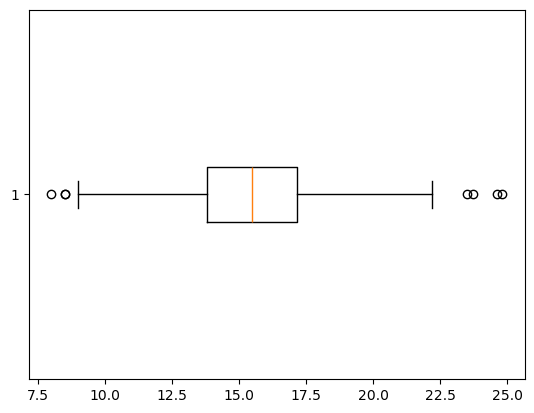

In [62]:
plt.boxplot(x ='acceleration',data=df,vert=False)

In [74]:
df[(df['acceleration'] >upper_bound) | (df['acceleration'] < lower_bound)]






,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,z-score
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,-2.563048
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,-2.563048
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340,-2.744360
59,23.0,4,97.0,54,2254,23.5,72,2,volkswagen type 3,2.876289
299,27.2,4,141.0,71,3190,24.8,79,2,peugeot 504,3.347698
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel),2.948813
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,3.275173


In [67]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,z-score
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,-1.293870
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,-1.475181
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,-1.656492
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,-1.293870
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,-1.837804
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0.011571
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,3.275173
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,-1.438919
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1.099439


In [72]:
df.loc[:,'acceleration'] 

0      12.0
1      11.5
2      11.0
3      12.0
4      10.5
       ... 
393    15.6
394    24.6
395    11.6
396    18.6
397    19.4
Name: acceleration, Length: 398, dtype: float64

In [88]:
df[(df['acceleration'] >upper_bound) | (df['acceleration'] < lower_bound)]['acceleration']

7       8.5
9       8.5
11      8.0
59     23.5
299    24.8
326    23.7
394    24.6
Name: acceleration, dtype: float64

In [99]:
def acc(ele):
    if (ele > upper_bound) or (ele < lower_bound):
        return df['acceleration'].median()
    else:
        return ele

df['acceleration'] = df['acceleration'].map(acc)

In [100]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,z-score
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,-1.293870
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,-1.475181
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,-1.656492
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,-1.293870
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,-1.837804
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,0.011571
394,44.0,4,97.0,52,2130,15.5,82,2,vw pickup,3.275173
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,-1.438919
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1.099439


In [102]:
df[(df['acceleration'] > upper_bound) | (df['acceleration'] < lower_bound)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,z-score
